In [2]:
#Registration Number 24MAI0114 , Abhaynath K
#pip install yfinance this library is needed for financial estimations
import pandas as pd

In [3]:
#pip install yfinance

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import yfinance as yf

In [5]:
#24MAI0114 ABHAYNATH K
#download historical gold price data
gold_data=yf.download('GC=F',start='2010-01-01', end='2023-12-12')

gold_data.head(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1117.699951,1122.300049,1097.099976,1117.699951,1117.699951,184
2010-01-05,1118.099976,1126.500000,1115.000000,1118.099976,1118.099976,53
2010-01-06,1135.900024,1139.199951,1120.699951,1135.900024,1135.900024,363
2010-01-07,1133.099976,1133.099976,1129.199951,1133.099976,1133.099976,56
2010-01-08,1138.199951,1138.199951,1122.699951,1138.199951,1138.199951,54
2010-01-11,1150.699951,1161.199951,1143.000000,1150.699951,1150.699951,177
2010-01-12,1128.900024,1157.199951,1127.199951,1128.900024,1128.900024,51
2010-01-13,1136.400024,1136.400024,1121.000000,1136.400024,1136.400024,58
2010-01-14,1137.000000,1145.900024,1132.800049,1142.599976,1142.599976,81


In [6]:
#24MAI0114 ABHAYNATH K
#use "Close" as the the target value
gold_data=gold_data[["Close"]]
gold_data=gold_data.dropna() #drop any raw with value NaN values
#rest index is used the datw as feature 
gold_data.reset_index(inplace=True)
gold_data['Date']=gold_data['Date'].map(pd.Timestamp.toordinal)

#display the first few raws after preprocessing
print(gold_data.head(10))

     Date        Close
0  733776  1117.699951
1  733777  1118.099976
2  733778  1135.900024
3  733779  1133.099976
4  733780  1138.199951
5  733783  1150.699951
6  733784  1128.900024
7  733785  1136.400024
8  733786  1142.599976
9  733787  1130.099976


In [7]:
#24MAI0114 ABHAYNATH K
#split data Training and test

#define features X and Y target
X = gold_data['Date']
Y= gold_data['Close']

#split data into train and test
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [8]:
X_train = X_train.values.reshape(-1, 1)
Y_train = Y_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
Y_test = Y_test.values.reshape(-1, 1)

In [9]:
#24MAI0114 ABHAYNATH K
#create and train model
model=LinearRegression()
#train model
model.fit(X_train,Y_train)

LinearRegression()

In [10]:
#Make Prediction
y_pred=model.predict(X_test)

In [11]:
print(y_pred)

[[1683.55977444]
 [1272.46424229]
 [1542.60703863]
 [1650.96320824]
 [1288.91205093]
 [1417.20495827]
 [1395.37423044]
 [1425.27933705]
 [1299.97694037]
 [1626.44102082]
 [1710.17531932]
 [1535.52949674]
 [1621.45683639]
 [1538.32064002]
 [1254.62086202]
 [1697.61517454]
 [1361.08304154]
 [1352.11150955]
 [1576.89822754]
 [1606.40459939]
 [1458.77305645]
 [1562.84282744]
 [1397.46758791]
 [1540.41399748]
 [1396.27138364]
 [1237.1762165 ]
 [1459.1717912 ]
 [1285.02438707]
 [1437.44074707]
 [1563.54061326]
 [1344.43586552]
 [1426.17649025]
 [1455.28412734]
 [1540.11494642]
 [1728.91585279]
 [1676.8809673 ]
 [1474.82213033]
 [1635.51223649]
 [1621.65620376]
 [1443.82050315]
 [1282.9310296 ]
 [1246.34711586]
 [1421.39167319]
 [1349.51973365]
 [1669.50437433]
 [1391.28719921]
 [1230.79646042]
 [1639.69895142]
 [1324.99754623]
 [1548.98679471]
 [1231.69361362]
 [1428.3695314 ]
 [1629.83026624]
 [1643.98535003]
 [1293.59718429]
 [1420.3948363 ]
 [1466.44870048]
 [1234.38507321]
 [1341.9437733

In [12]:
#24MAI0114 ABHAYNATH K
#calculate the performance matrix
mse=mean_squared_error(Y_test,y_pred)
r2=r2_score(Y_test,y_pred)

print("24MAI0114")
print("Mean Squared Error(MSE)= ", mse)
print("R2 Score = ",  r2)

24MAI0114
Mean Squared Error(MSE)=  53140.08836042425
R2 Score =  0.263952437791531


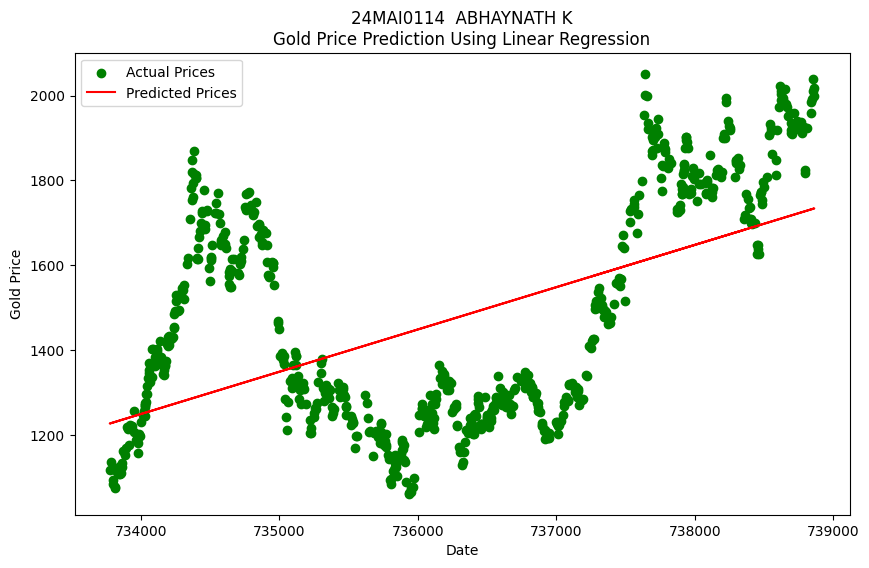

In [15]:
#Visulization of the result
plt.figure(figsize=(10,6))
plt.scatter(X_test,Y_test,color='green',label='Actual Prices')
plt.plot(X_test,y_pred, color='red',label='Predicted Prices')
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.title("24MAI0114  ABHAYNATH K\nGold Price Prediction Using Linear Regression")
plt.legend()
plt.show()

In [ ]:
#predicting of price in a single date 
input_date ='2024-01-15'
input_date = pd.Timestamp(input_date)
input_date_ordinal = input_date.toordinal()
predicted_price = model.predict([[input_date_ordinal]])
print(predicted_price)

[[1737.88738477]]
